In [1]:
# STEP 1: Import Libraries

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Save model
import joblib

import os


In [2]:
df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")

# Show first few rows
df.head()

,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,57,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
1,Andaman & Nicobar Islands,Dacoity,2001,7,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
2,Andaman & Nicobar Islands,Dowry Deaths,2001,0,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
3,Andaman & Nicobar Islands,Kidnapping & Abduction,2001,33,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
4,Andaman & Nicobar Islands,Murder,2001,10,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3


In [3]:
# STEP 3: Explore dataset

print("Shape:", df.shape)      # rows & columns
print("\nColumns:\n", df.columns.tolist())

df.info()                      # column types & missing values
df.describe()                 # summary stats (numerical)


Shape: (6930, 18)

Columns:
 ['State', 'Crime_Type', 'Year', 'Cases', 'unemployment_rate', 'poverty_rate', 'per_capita_income', 'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate', 'youth_population_percent', 'urbanization_rate', 'human_development_index', 'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k', 'alcohol_consumption_per_capita']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6930 non-null   object 
 1   Crime_Type                      6930 non-null   object 
 2   Year                            6930 non-null   int64  
 3   Cases                           6930 non-null   int64  
 4   unemployment_rate               6930 non-null   float64
 5   poverty_rate                    6930 non-null   float64
 6   per_capit

,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,2011.500000,2494.161760,5.897364,28.075610,48335.532675,4.983247,103.270130,901.533766,69.921675,25.178312,37.020779,0.652336,10.174026,36.987662,103.738961,2.669688
std,6.344747,8069.454875,0.994195,4.293755,39523.696963,1.419813,96.061581,27.151033,7.350325,2.948810,8.139293,0.054179,4.173605,6.252405,20.232866,0.560403
min,2001.000000,0.000000,2.800000,18.600000,5712.000000,2.000000,10.000000,850.000000,54.960000,16.580000,17.000000,0.484000,5.000000,22.100000,54.000000,1.170000
25%,2006.000000,31.000000,5.230000,24.980000,23480.140000,3.990000,11.000000,879.000000,64.190000,22.920000,30.400000,0.616000,7.000000,32.200000,89.000000,2.280000
50%,2011.500000,285.000000,5.955000,27.500000,38289.500000,5.035000,87.000000,904.000000,69.240000,25.650000,36.700000,0.654000,9.000000,37.600000,104.000000,2.650000
75%,2017.000000,1398.750000,6.590000,31.000000,66358.000000,5.950000,165.000000,923.000000,75.070000,27.580000,43.800000,0.691000,13.000000,41.700000,117.000000,3.070000
max,2022.000000,163119.000000,8.550000,39.230000,199643.430000,8.870000,408.000000,952.000000,84.520000,31.000000,54.400000,0.810000,19.000000,51.100000,166.000000,4.070000


In [4]:
# STEP 4: Define X (features) and y (target)

X = df.drop("Cases", axis=1)   # all columns except Cases
y = df["Cases"]                # target variable


In [5]:
# STEP 5: Separate categorical & numerical columns

cat_cols = ["State", "Crime_Type"]
num_cols = [col for col in X.columns if col not in cat_cols]

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['State', 'Crime_Type']
Numerical columns: ['Year', 'unemployment_rate', 'poverty_rate', 'per_capita_income', 'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate', 'youth_population_percent', 'urbanization_rate', 'human_development_index', 'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k', 'alcohol_consumption_per_capita']


In [6]:
# STEP 6: Preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)


In [7]:
# STEP 7: Train-Val-Test Split based on Year

train_df = df[df["Year"] <= 2020]
test_df  = df[df["Year"] >= 2021]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (6300, 18)
Test shape: (630, 18)


In [8]:
# Features & Target

X_train = train_df.drop("Cases", axis=1)
y_train = train_df["Cases"]

X_test = test_df.drop("Cases", axis=1)
y_test = test_df["Cases"]


In [9]:
# Fit on training
preprocessor.fit(X_train)

# Transform
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)
print("Train shape:", X_train_transformed.shape)
print("Test shape:", X_test_transformed.shape)

Train shape: (6300, 59)
Test shape: (630, 59)


In [10]:
#Train Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_transformed, y_train)

# Predict on train data
y_train_pred = dt_model.predict(X_train_transformed)
# Predict on test data
y_test_pred = dt_model.predict(X_test_transformed)



In [11]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [12]:
# Evaluate on Train Data
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Evaluate on Test Data
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Decision Tree Performance Comparison:")
print(f"Train R²: {r2_train:.4f} | Test R²: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")

Decision Tree Performance Comparison:
Train R²: 1.0000 | Test R²: 0.2969
Train MAE: 0.00 | Test MAE: 1540.93
Train RMSE: 0.00 | Test RMSE: 5885.37


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Lists to store results
results = []

for depth in [1, 2, 3, 4, 5, 7, 11, 13, 15, None]:
    dt = DecisionTreeRegressor(
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    dt.fit(X_train_transformed, y_train)
    
    # Predictions
    y_train_pred = dt.predict(X_train_transformed)
    y_test_pred  = dt.predict(X_test_transformed)
    
    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test  = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append({
        "Depth": depth,
        "Train R²": r2_train,
        "Test R²": r2_test,
        "Train MAE": mae_train,
        "Test MAE": mae_test,
        "Train RMSE": rmse_train,
        "Test RMSE": rmse_test
    })

# Create a DataFrame for better view
df_results = pd.DataFrame(results)
print(df_results)


   Depth  Train R²   Test R²    Train MAE     Test MAE   Train RMSE  \
0    1.0  0.266984  0.332215  2624.092834  2437.376383  6991.659149   
1    2.0  0.513804  0.644559  2012.372291  1783.450306  5694.155983   
2    3.0  0.588020  0.714219  1598.070337  1387.287868  5241.572374   
3    4.0  0.669390  0.734197  1301.362214  1190.424190  4695.493203   
4    5.0  0.705648  0.721414  1165.404448  1176.128022  4430.540949   
5    7.0  0.822349  0.558004   924.604563  1273.793381  3441.973624   
6   11.0  0.943560  0.366373   454.847879  1447.266602  1940.075413   
7   13.0  0.978293  0.041487   277.266360  1740.831449  1203.147863   
8   15.0  0.991541  0.051111   145.647491  1733.610618   751.063864   
9    NaN  1.000000  0.296860     0.000000  1540.930159     0.000000   

     Test RMSE  
0  5735.496176  
1  4184.434558  
2  3752.055931  
3  3618.534514  
4  3704.521405  
5  4666.182816  
6  5586.883389  
7  6871.503752  
8  6836.918552  
9  5885.369869  


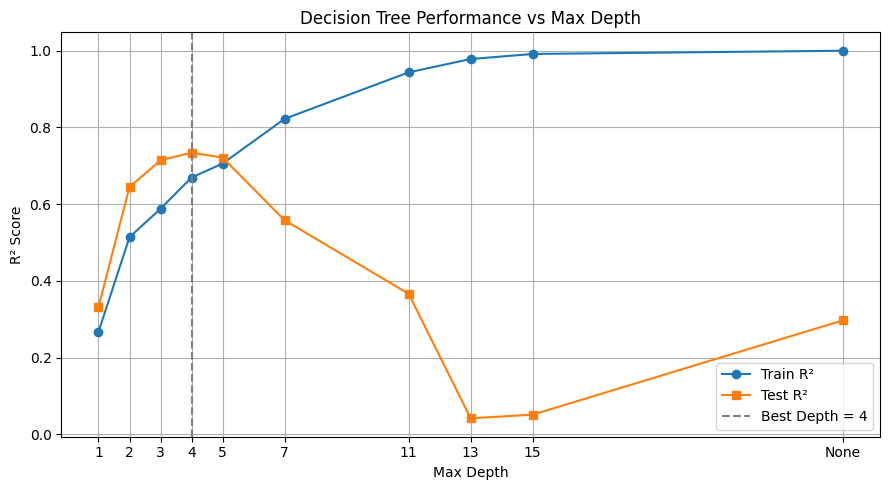

In [14]:
import matplotlib.pyplot as plt

depths = [1, 2, 3, 4, 5, 7, 11, 13, 15, None]
train_r2 = [
    0.266984, 0.513804, 0.588020, 0.669390, 0.705648,
    0.822349, 0.943560, 0.978293, 0.991541, 1.000000
]

test_r2 = [
    0.332215, 0.644559, 0.714219, 0.734197, 0.721414,
    0.558004, 0.366373, 0.041487, 0.051111, 0.296860
]

# Replace None with a numeric depth for plotting
plot_depths = [d if d is not None else 25 for d in depths]

plt.figure(figsize=(9,5))

plt.plot(plot_depths, train_r2, marker='o', label="Train R²")
plt.plot(plot_depths, test_r2, marker='s', label="Test R²")

# Best depth (from highest Test R²)
best_depth = depths[test_r2.index(max(test_r2))]
plt.axvline(best_depth if best_depth is not None else 25,
            color='gray', linestyle='--', label=f"Best Depth = {best_depth}")

plt.title("Decision Tree Performance vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.grid(True)

# Show None on x-axis
plt.xticks(plot_depths, [str(d) for d in depths])

plt.legend()
plt.tight_layout()
plt.show()


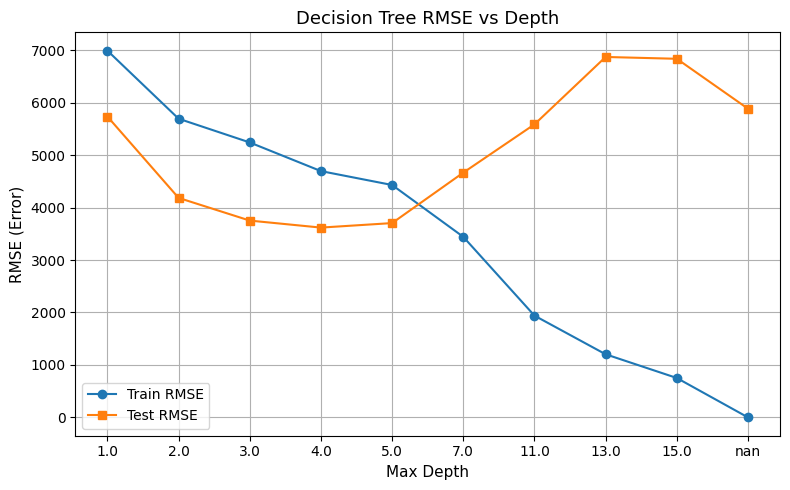

In [15]:
import matplotlib.pyplot as plt

# Convert depth column to string while keeping order intact
depth_labels = df_results["Depth"].astype(str)

plt.figure(figsize=(8,5))

plt.plot(depth_labels, df_results["Train RMSE"],
         marker='o', label="Train RMSE")

plt.plot(depth_labels, df_results["Test RMSE"],
         marker='s', label="Test RMSE")

plt.title("Decision Tree RMSE vs Depth", fontsize=13)
plt.xlabel("Max Depth", fontsize=11)
plt.ylabel("RMSE (Error)", fontsize=11)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Train final Decision Tree
dt_final = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_final.fit(X_train_transformed, y_train)

# Predictions on test data
y_pred = dt_final.predict(X_test_transformed)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Final Decision Tree Model Evaluation (Depth = 4):")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")

✅ Final Decision Tree Model Evaluation (Depth = 4):
R² Score : 0.7342
MAE      : 1190.42
RMSE     : 3618.53


In [17]:
# STEP : Feature Importance

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

importances = dt_model.feature_importances_

# Sort important features
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:15]

print("Top 15 Important Features:")
for feature, score in feat_imp:
    print(f"{feature}: {score:.4f}")


Top 15 Important Features:
cat__Crime_Type_Theft: 0.2670
num__population_density: 0.2458
num__per_capita_income: 0.1054
num__conviction_rate: 0.0672
num__Year: 0.0519
num__literacy_rate: 0.0450
num__human_development_index: 0.0283
cat__State_Kerala: 0.0273
num__inflation_rate: 0.0269
num__youth_population_percent: 0.0204
num__poverty_rate: 0.0204
num__unemployment_rate: 0.0165
cat__Crime_Type_Burglary: 0.0148
num__gender_ratio: 0.0121
cat__Crime_Type_Kidnapping & Abduction: 0.0113


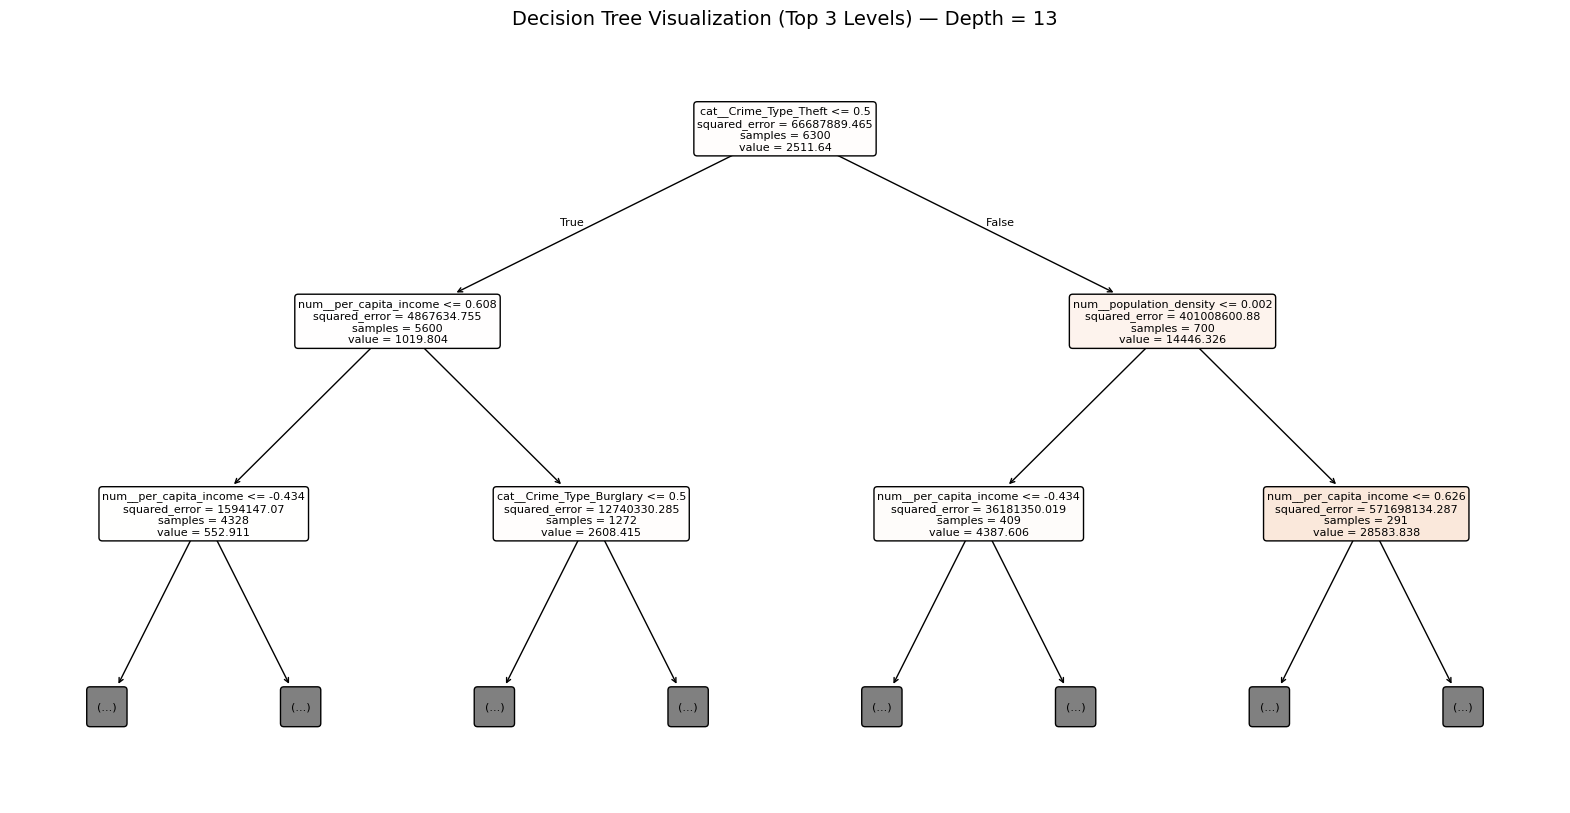

In [18]:

from sklearn.tree import DecisionTreeRegressor, plot_tree
# Visualize only top few levels (for readability)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_final, 
    max_depth=2,                               # Show top 3 levels only
    filled=True,                               # Color nodes based on prediction
    fontsize=8, 
    feature_names=preprocessor.get_feature_names_out(),  # Show actual column names
    rounded=True
)
plt.title("Decision Tree Visualization (Top 3 Levels) — Depth = 13", fontsize=14)
plt.show()


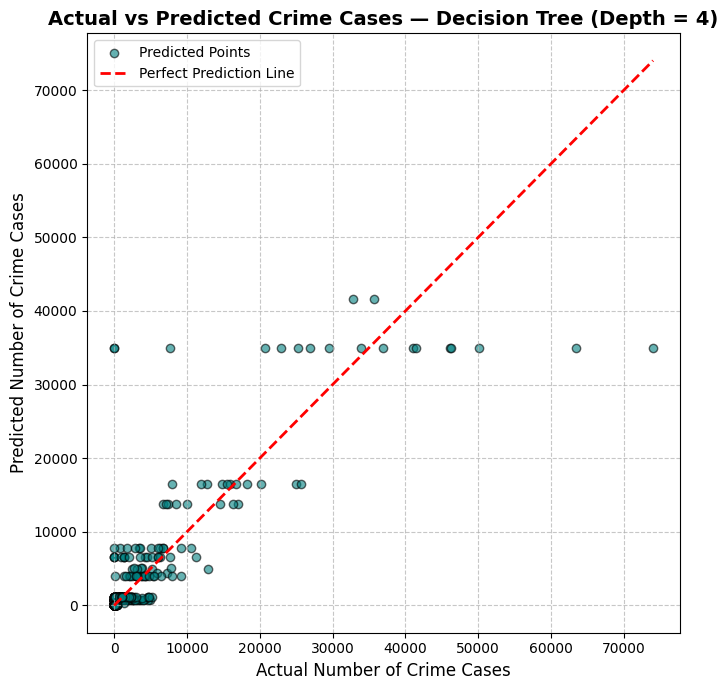

In [19]:
#The scatter plot compares actual vs predicted crime case counts for the test dataset.
#Points lying close to the red dashed line indicate accurate predictions.
#A moderate spread around the line suggests the model captures general trends but misses some variations, which is expected in complex #socio-economic data.

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6, edgecolor='k', label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.title("Actual vs Predicted Crime Cases — Decision Tree (Depth = 4)", fontsize=14, fontweight='bold')
plt.xlabel("Actual Number of Crime Cases", fontsize=12)
plt.ylabel("Predicted Number of Crime Cases", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
import joblib
joblib.dump(dt_final, "../model/decision_tree_final_depth13.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [21]:
joblib.dump(preprocessor, "../model/decision_tree_preprocessor.pkl")
print("Preprocessor saved!")


Preprocessor saved!
